#Imports & Loading GapMinder data

Use the dataset provided (gapminder_lifeExp_gdp) to reproduce the following plots.



In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:

#pfile = input('Please enter the path/file to read: ')
#infile = pfile
infile =  'gapminder_lifeExp_gdp.csv'

dt = {'names':('country', 'year', 'pop', 'continent', 'lifeExp', 'gdp'), 'formats':('U25',np.int16, np.float, 'U10',
np.float, np.float)}
npdata = np.genfromtxt(infile, dtype=dt, delimiter=',', skip_header = 1)

""" Remove Oceania Entries """

oceania = np.where(npdata['continent'] == 'Oceania')
npdata = np.delete(npdata, oceania)

AfricaYrsPop = []
AmericaYrsPop = []
AsiaYrsPop = []
EuropeYrsPop = []
conts = np.unique(npdata['continent'])
ContLifeExp = {k:[] for k in conts}
country_names = ['United States', 'Germany', 'Egypt', 'China']
countryLifeExp = {k:[] for k in country_names}


#years = {1952:0, 1957:0, 1962:0, 1967:0, 1972:0, 1987:0, 1992:0, 1997:0, 2002:0, 2007:0}
years = {k:0 for k in np.unique(npdata['year'])}
yrs = list(years.keys())

for i in years.keys():
  years[i] = np.array(npdata[npdata['year']==i])
  curryear = years[i]
  continents = np.array([curryear[curryear['continent']==j] for j in conts])
  countries = np.array([curryear[curryear['country']==j] for j in country_names])
  AfricaYrsPop.append(sum(continents[0]['pop']))
  AmericaYrsPop.append(sum(continents[1]['pop']))
  AsiaYrsPop.append(sum(continents[2]['pop']))
  EuropeYrsPop.append(sum(continents[3]['pop']))
  count=0
  for j in conts:
    ContLifeExp[j].append(np.mean(continents[count]['lifeExp']))
    count +=1
  count=0
  for j in country_names:
    countryLifeExp[j].append(np.sum(countries[count]['lifeExp']))
    count +=1
    
_07 = years[2007]
conts_custom = ['Asia', 'Africa', 'Europe', 'Americas']
ContPop07 = [_07[_07['continent']==i] for i in conts_custom]
ContPop07 = [sum (i) for i in [ContPop07[j]['pop'] for j in range(4)]]


#Q1)

a) Stacked bar chart and a pie chart (as subplots) for world population.

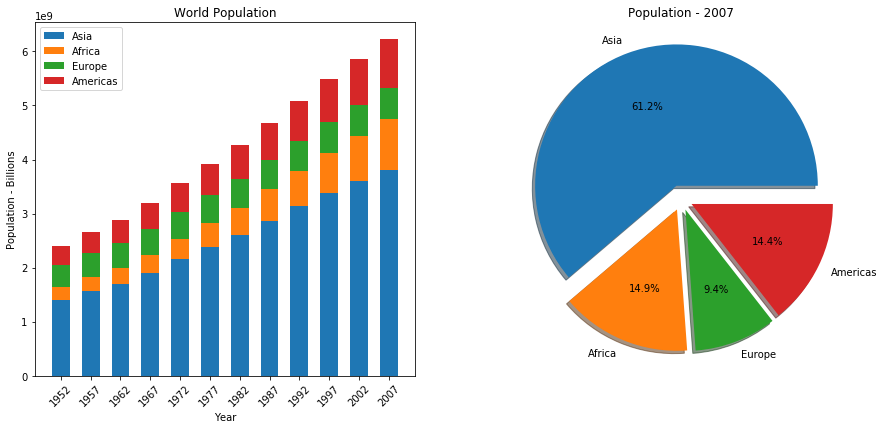

In [248]:


_2= np.array(AfricaYrsPop)+np.array(AsiaYrsPop)
_3 = _2 + EuropeYrsPop
gs = plt.GridSpec(1,2)
fig = plt.figure(figsize=(15,6.5))
p1 = plt.subplot(gs[0,0])
p2 = plt.subplot(gs[0,1])
p1.bar(yrs, AsiaYrsPop, width=3)
p1.bar(yrs, AfricaYrsPop, width=3, bottom=AsiaYrsPop  )
p1.bar(yrs, EuropeYrsPop , width=3, bottom=_2  )
p1.bar(yrs, AmericaYrsPop , width=3, bottom=_3 )
p1.set_ylabel("Population - Billions") 
p1.set_xlabel("Year")
p1.set_xticks(ticks=yrs)
p1.set_xticklabels(labels=yrs, rotation=45)
p1.set_title("World Population")
p1.legend(['Asia','Africa','Europe', 'Americas'])

conts_custom = ['Asia', 'Africa', 'Europe', 'Americas']
explode =  [0.1, 0.08,0.08,0.08]

p2.pie(ContPop07, labels = conts_custom, 
        autopct='%1.1f%%',shadow=True, explode = explode)
p2.set_title("Population - 2007")
plt.show()

b) Mean of life expectancy over years in each continent (line)

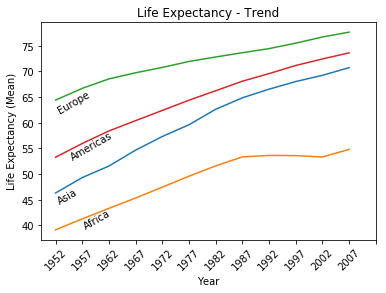

In [253]:
plt.plot(ContLifeExp['Asia'])
plt.plot(ContLifeExp['Africa'])
plt.plot(ContLifeExp['Europe'])
plt.plot(ContLifeExp['Americas'])
plt.xticks([i for i in range(13)], labels=yrs, rotation=45)
plt.ylabel("Life Expectancy (Mean)")
plt.xlabel("Year")
plt.title("Life Expectancy - Trend")
plt.annotate('Asia', (0,46), rotation=30)
plt.annotate('Africa', (1,42), rotation=30)
plt.annotate('Europe', (0,65), rotation=30)
plt.annotate('Americas', (0.5,57), rotation=30)
plt.show()


c) The trend of life expectancy over years for four countries (USA, Germany, Egypt, and China). (4 line charts with dots)

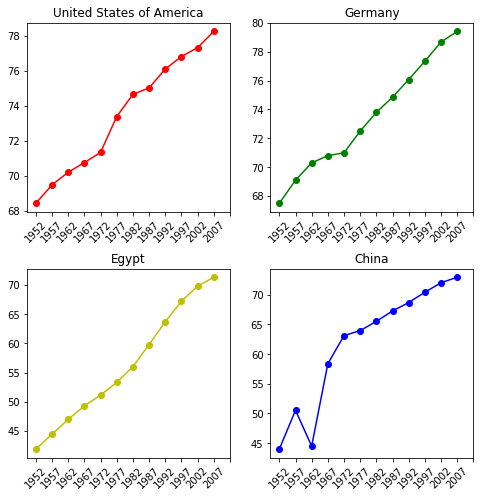

In [254]:
#grid

gs = plt.GridSpec(2,2, hspace=0.3)
fig = plt.figure(figsize=(8,8))

USA = plt.subplot(gs[0,0])
GER = plt.subplot(gs[0,1])
EGY = plt.subplot(gs[1,0])
CHI = plt.subplot(gs[1,1])

USA.plot(countryLifeExp['United States'], '-or')
GER.plot(countryLifeExp['Germany'], '-og')
EGY.plot(countryLifeExp['Egypt'], '-oy')
CHI.plot(countryLifeExp['China'], '-ob')

xcoords = [i for i in range(13)]
USA.set_xticks(xcoords)
GER.set_xticks(xcoords)
EGY.set_xticks(xcoords)
CHI.set_xticks(xcoords)

USA.set_xticklabels(labels=yrs, rotation=45)
GER.set_xticklabels(labels=yrs, rotation=45)
EGY.set_xticklabels(labels=yrs, rotation=45)
CHI.set_xticklabels(labels=yrs, rotation=45)

USA.set_title('United States of America')
GER.set_title('Germany')
EGY.set_title('Egypt')
CHI.set_title('China')

plt.show()